In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
cancer = load_breast_cancer()
print(dir(cancer))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
cancer.data.shape

(569, 30)

In [6]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
print(cancer.target_names)

['malignant' 'benign']


In [10]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
# Convert the dataset to a DataFrame for easier manipulation
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=np.append(cancer.feature_names, ['target']))


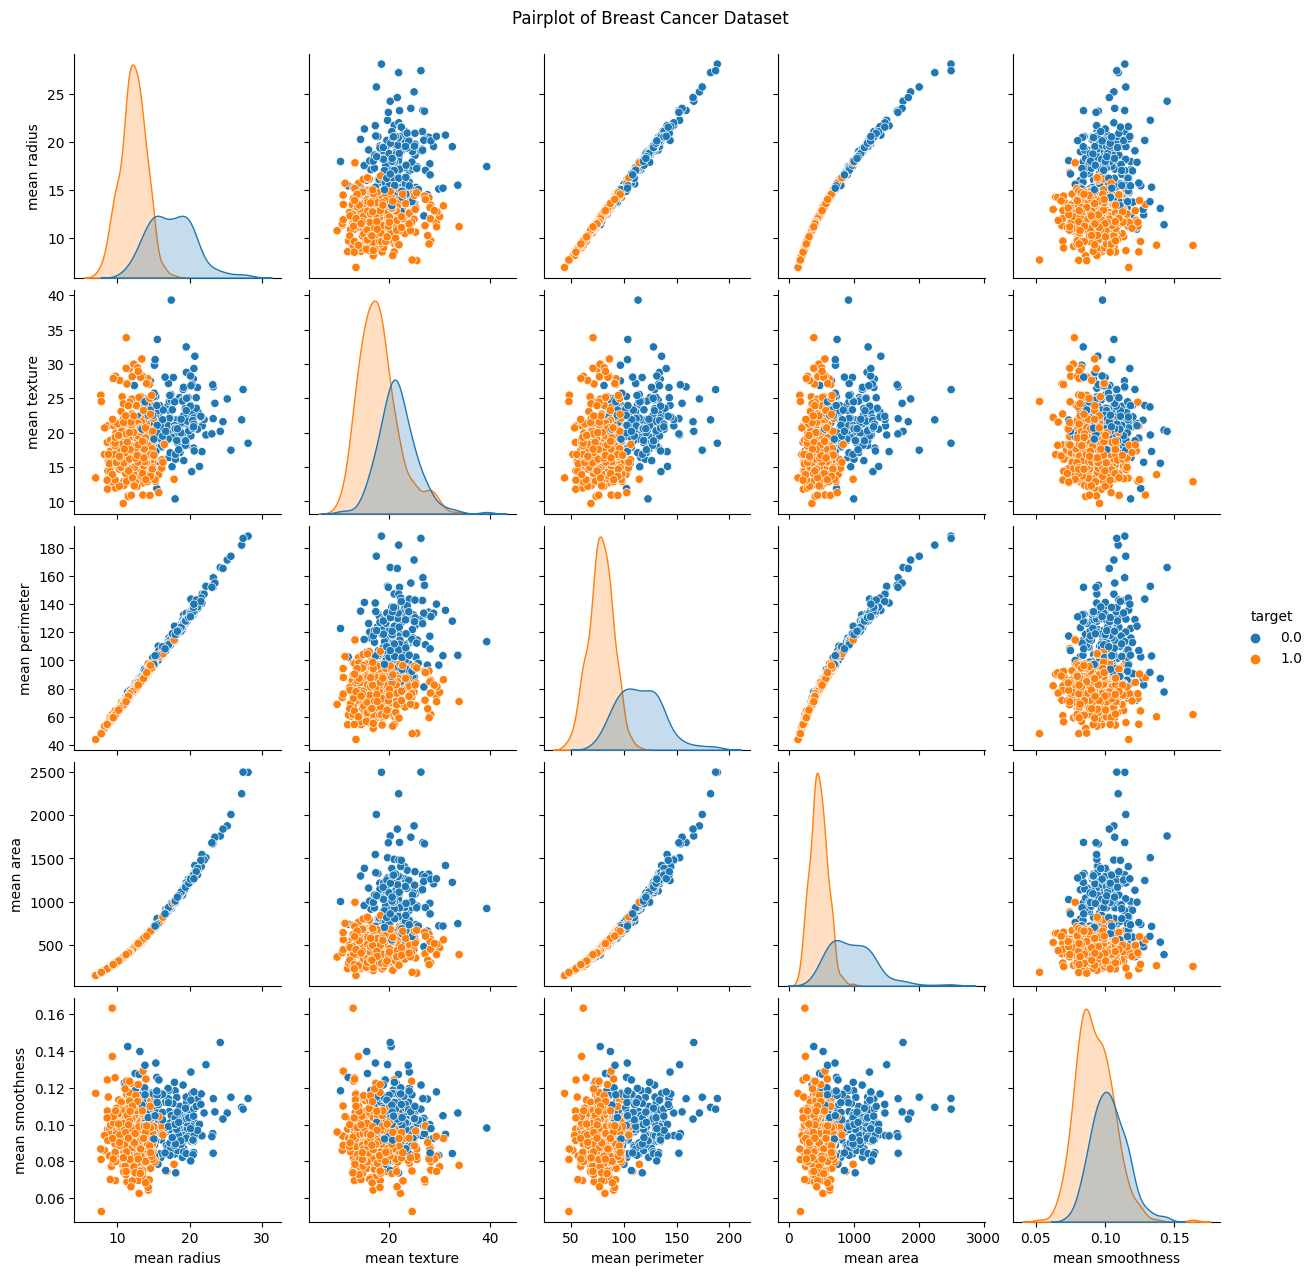

In [12]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])
plt.suptitle('Pairplot of Breast Cancer Dataset', y=1.02)
plt.show()

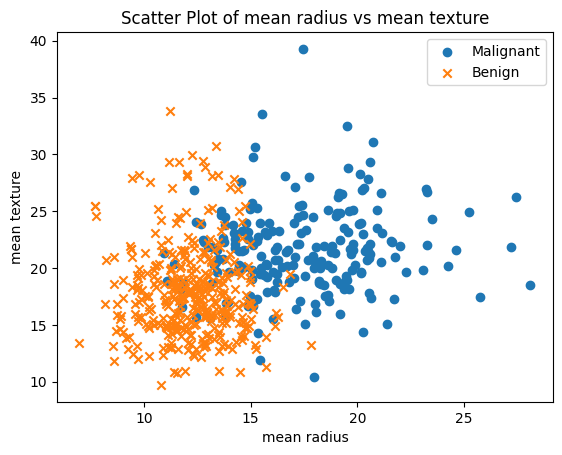

In [15]:
# Scatter plot to visualize relationship between two specific features
feature1 = 'mean radius'
feature2 = 'mean texture'
plt.scatter(df[df['target'] == 0][feature1], df[df['target'] == 0][feature2], label='Malignant', marker='o')
plt.scatter(df[df['target'] == 1][feature1], df[df['target'] == 1][feature2], label='Benign', marker='x')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Scatter Plot of {feature1} vs {feature2}')
plt.legend()
plt.show()

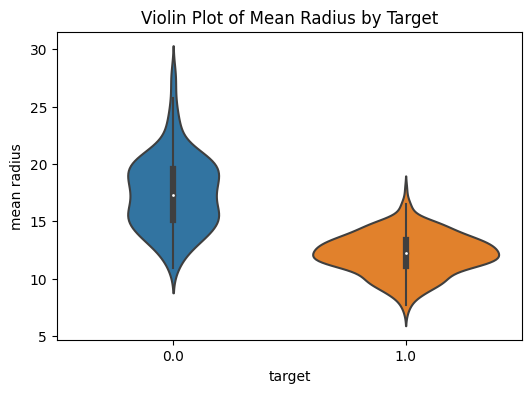

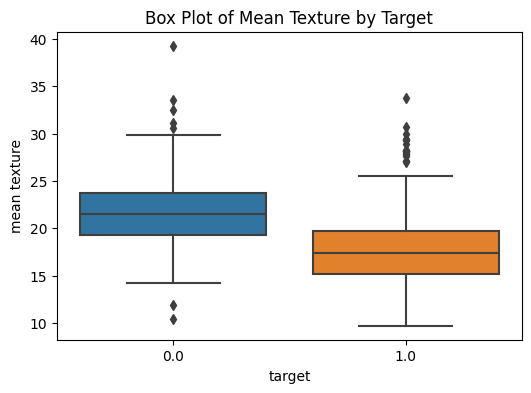

In [20]:
# Violin plot for distribution of features by target variable
plt.figure(figsize=(6, 4))
sns.violinplot(x='target', y='mean radius', data=df)
plt.title('Violin Plot of Mean Radius by Target')
plt.show()

# Box plot for distribution of features by target variable
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='mean texture', data=df)
plt.title('Box Plot of Mean Texture by Target')
plt.show()



c:\Users\AhMed_RaFiQ\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\AhMed_RaFiQ\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


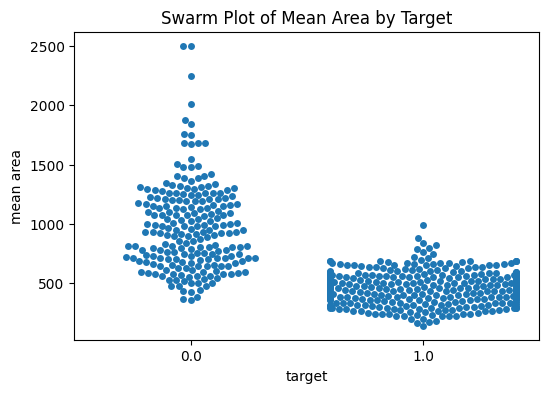

In [22]:
# Swarm plot to visualize the distribution of 'mean area' by target
plt.figure(figsize=(6, 4))
sns.swarmplot(x='target', y='mean area', data=df)
plt.title('Swarm Plot of Mean Area by Target')
plt.show()

In [23]:
X = cancer.data
y = cancer.target

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [25]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

455
114
455
114


In [26]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [27]:
model.score(X_test,y_test)

0.9035087719298246

In [28]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0])

In [29]:
y_test

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0])

In [30]:
accuracy_score(y_test, y_pred)

0.9035087719298246

In [37]:
patient1 = [[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.0787,
             153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 1, 1.1184, 0.2776, 0.3001, 0.1471, 0.2419,
             0.6656, 0.7119, 0.2654, 0.4601, 0,0.1189]]
pred = model.predict(patient1)
print(pred)

[1]


In [38]:
prediction = model.predict(patient1)

if prediction[0] == 0:
    print("Patient Has Cancer (Malignant)")
else:
    print("patient Has no Cancer (Banign)")

patient Has no Cancer (Banign)


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82        34
           1       0.90      0.97      0.93        80

    accuracy                           0.90       114
   macro avg       0.91      0.86      0.88       114
weighted avg       0.91      0.90      0.90       114

